In [1]:
import urllib
import pandas as pd
import numpy as np
import datetime
import string
import pymysql as mdb

In [2]:
import sqlalchemy as sa
from pandas import read_sql
import matplotlib.pyplot as plt

In [3]:
str='2015030416'
def date_parse(str):
    year =int(str[:4])
    month=int(str[4:6])
    day=int(str[6:8])
    hour=int(str[8:])
    return datetime.datetime(year,month,day,hour)
    
print date_parse(str)

2015-03-04 16:00:00


In [4]:
afile="/Users/abramvandergeest/mysql_insightwiki_auth.txt"
a=open(afile)
passwd=a.readline().rstrip()
a.close()
host='localhost'; user='abram.ghost';db='wikidata'
con = mdb.connect(host, user, passwd, db)

In [6]:
with con:
    curt= con.cursor()
    #sql="SELECT COUNT(*) FROM `topics` "
    
    sql="SELECT `Id`,`topic_label`,`topic_string` FROM `topics`;"
    curt.execute(sql)
    topics=[]
    for topic in curt:
        topics.append(topic)

In [7]:

data={}
df=[]
with con:
    curt= con.cursor()
    #sql="SELECT COUNT(*) FROM `topics` "
    #curt.execute(sql)
    sql="SELECT `Id`,`topic_label`,`topic_string` FROM `topics`;"
    curt.execute(sql)
    for row in curt:
        #cur = con.cursor()
        sql='''SELECT `page_views`.`count` AS `vc`,`page_views`.`date` AS `vd` 
             FROM `topics` INNER JOIN `page_views` on `topics`.`ID` = `page_views`.`topic_id` 
             WHERE `topics`.`id`=%s '''

        #print sql
        
        data[row[1]]=read_sql(sql, con,params=[row[0]])
        #df.append([row[1],read_sql(sql, con,params=[row[0]])])
        #data[row[1]]=df[len(df)-1][1]



warinafghanistan


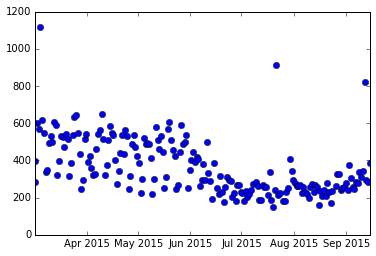

In [51]:
%matplotlib inline
top=topics[47][1]#topic to consider for now
print top
data[top]['date']=map(lambda x:date_parse(x),data[top]['vd'] )
#df[1][['tl','vd','vc']]
a=plt.plot_date(data[top][['date']].values,data[top][['vc']].values)
plt.show()